In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/base de dados/dataset_balanceado_limpo.csv', encoding='utf-8', sep=',')

Mounted at /content/drive


In [ ]:
def normalize_dataframe(df):
    for coluna in df.columns:
        if df[coluna].dtype != 'category':  # Verifica se a coluna é numérica
            max_valor = df[coluna].max()
            df[coluna] = df[coluna] / max_valor  # Divide todos os valores da coluna pelo máximo

In [ ]:
labels = df[' Label']

data = df.drop(columns=[' Label'])

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

labels_categorico = to_categorical(labels_encoded, num_classes=7)

In [ ]:
data = data.drop(columns=['Bwd Avg Bulk Rate', ' Flow Packets/s', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' ECE Flag Count', ' PSH Flag Count', 'FIN Flag Count', ' Bwd URG Flags', ' Fwd URG Flags', ' Bwd PSH Flags'], axis=1)
indices_selecionados = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 34, 35, 36, 37, 38, 41, 43, 44, 47, 55, 56, 58, 66, 67]
data = data.iloc[:, indices_selecionados]


In [ ]:
normalize_dataframe(data)

In [ ]:
print(data)

         Source Port   Destination Port   Protocol   Flow Duration  \
0           0.011735           0.298177   1.000000    8.334114e-09   
1           0.960417           0.362219   1.000000    8.334114e-09   
2           0.009888           0.149371   1.000000    8.334114e-09   
3           0.851113           0.001221   0.352941    2.337719e-04   
4           0.013734           0.090883   1.000000    8.334114e-09   
...              ...                ...        ...             ...   
628571      0.512856           0.216693   1.000000    1.666823e-08   
628572      0.779699           0.411215   1.000000    8.334114e-09   
628573      0.760075           0.760372   1.000000    8.334114e-09   
628574      0.797797           0.851087   1.000000    9.084684e-04   
628575      0.761082           0.155840   1.000000    8.334114e-09   

        Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                          0.015633                           0.0   
1                    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_categorico, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Reshape((35, 1), input_shape=(35,)),
    layers.Conv1D(128, 16, activation='relu'),
    layers.Conv1D(64, 8, activation='relu', strides=2, padding='same'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(7, activation='softmax')
  ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25, batch_size=100, validation_split=0.1)

y_pred = model.predict(X_test)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f'Perda: {loss:.4f}, Acurácia: {accuracy * 100:.2f}%')

Epoch 1/25
4526/4526 [==============================] - 37s 6ms/step - loss: 1.1062 - accuracy: 0.8296 - val_loss: 0.2832 - val_accuracy: 0.8272
Epoch 2/25
4526/4526 [==============================] - 24s 5ms/step - loss: 0.5169 - accuracy: 0.8446 - val_loss: 0.2442 - val_accuracy: 0.8584
Epoch 3/25
4526/4526 [==============================] - 24s 5ms/step - loss: 0.3764 - accuracy: 0.8501 - val_loss: 0.2532 - val_accuracy: 0.8549
Epoch 4/25
4526/4526 [==============================] - 22s 5ms/step - loss: 0.2471 - accuracy: 0.8567 - val_loss: 0.2346 - val_accuracy: 0.8698
Epoch 5/25
4526/4526 [==============================] - 24s 5ms/step - loss: 0.2297 - accuracy: 0.8658 - val_loss: 0.2207 - val_accuracy: 0.8723
Epoch 6/25
4526/4526 [==============================] - 31s 7ms/step - loss: 0.3184 - accuracy: 0.8851 - val_loss: 0.2017 - val_accuracy: 0.8924
Epoch 7/25
4526/4526 [==============================] - 23s 5ms/step - loss: 0.2046 - accuracy: 0.8899 - val_loss: 0.2050 - val_ac

Matriz de Confusão:
[[ 5780     0     0     0     3     0     0]
 [    0 19921     4     1     2     0     0]
 [    0    11 19771     0    16     0   587]
 [    1     0     0 10044  2538     0     0]
 [    0     3     4  9950 17531    11     0]
 [    0     0     0     2     2 19812     1]
 [    0     0   314     1     1     6 19399]]


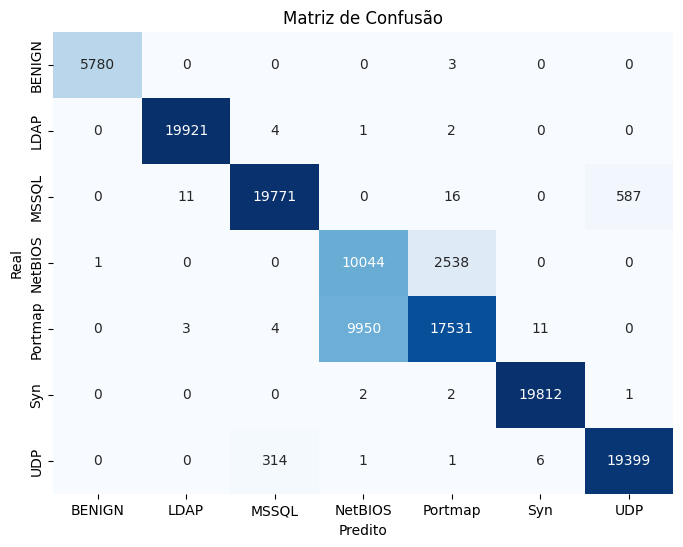

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix( y_pred_labels, y_test_labels)

print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
unique_values, counts = np.unique(y_pred_labels, return_counts=True)

contagem_por_classe = dict(zip(unique_values, counts))

porcentagem_por_classe = {classe: (conf_matrix[i, i] / contagem_por_classe[classe]) * 100
                           for i, classe in enumerate(unique_values)}

print("Porcentagem de acertos por classe:")
print(porcentagem_por_classe)

Porcentagem de acertos por classe:
{0: 99.94812381117067, 1: 99.96487354476113, 2: 96.98798135884229, 3: 79.82198203925932, 4: 63.75140914215063, 5: 99.97476913760912, 6: 98.36722275746665}


In [ ]:
drive.mount('/content/drive')

df_teste = pd.read_csv('/content/drive/MyDrive/base de dados/dataset_teste.csv', encoding='utf-8', sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels_teste = df_teste[' Label']

data_teste = df_teste.drop(columns=[' Label'])

label_encoder = LabelEncoder()
labels_encoded_teste = label_encoder.fit_transform(labels_teste)
y_teste = to_categorical(labels_encoded_teste, num_classes=7)

In [ ]:
data_teste = data_teste.drop(columns=['Bwd Avg Bulk Rate', ' Flow Packets/s', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' ECE Flag Count', ' PSH Flag Count', 'FIN Flag Count', ' Bwd URG Flags', ' Fwd URG Flags', ' Bwd PSH Flags'], axis=1)
indices_selecionados = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 34, 35, 36, 37, 38, 41, 43, 44, 47, 55, 56, 58, 66, 67]
data_teste = data_teste.iloc[:, indices_selecionados]

In [ ]:
normalize_dataframe(data_teste)

In [ ]:
y_pred_teste = model.predict(data_teste)

_, accuracy = model.evaluate(data_teste, y_teste, verbose=1)

print(f'Accuracy on Test Set: {accuracy}')

15625/15625 [==============================] - 51s 3ms/step - loss: 0.4303 - accuracy: 0.8310
Accuracy on Test Set: 0.8309500217437744


Matriz de Confusão:
[[  6886      1      8      0     10      4      1]
 [     0   9799    277      8     61      0      0]
 [     0      7 112748      0    495     17  15091]
 [     0      5     18  40477   7363      0      2]
 [     0    117    861  59420  87326      2    563]
 [     0      2     44      0     10  99952     26]
 [     0      0     98      3      8      3  58287]]


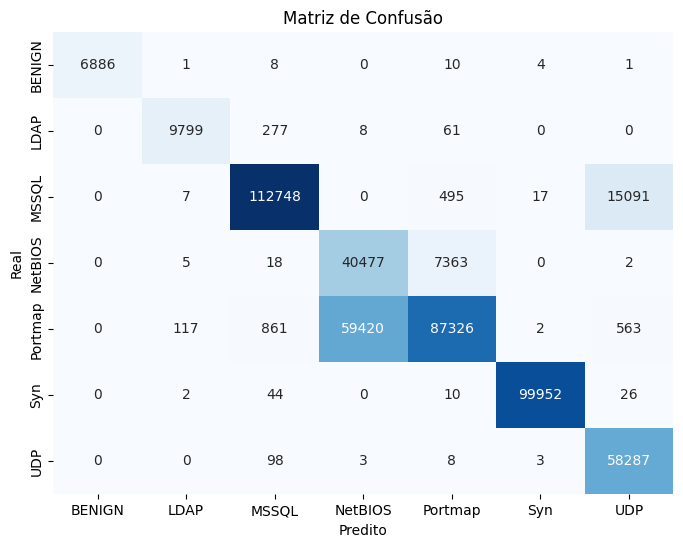

In [ ]:
y_pred_teste = np.argmax(y_pred_teste, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_pred_teste, labels_encoded_teste)

print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
unique_values, counts = np.unique(y_pred_teste, return_counts=True)

contagem_por_classe = dict(zip(unique_values, counts))

porcentagem_por_classe = {classe: (conf_matrix[i, i] / contagem_por_classe[classe]) * 100
                           for i, classe in enumerate(unique_values)}

print("Porcentagem de acertos por classe:")
print(porcentagem_por_classe)

Porcentagem de acertos por classe:
{0: 99.65267727930535, 1: 96.58945293247906, 2: 87.83870113276929, 3: 84.56492217695603, 4: 58.889061225040294, 5: 99.91802787052401, 6: 99.80821589410778}
